These data were useless because the roach1 LO was being set instead of the mark2 LO. Files deleted.

In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import nc

In [3]:
from collections import namedtuple
ResonatorData = namedtuple('ResonatorData', field_names=['f_data', 's21_data',
                                                         'f_model', 's21_model',
                                                         'f_r', 's21_r'])

def extract(resonator, normalize, num_model_points):
    f_data = resonator.frequency.copy()
    s21_data = resonator.data.copy()
    f_model = np.linspace(f_data.min(), f_data.max(), num_model_points)
    s21_model = resonator.model.eval(params=resonator.current_params, f=f_model)
    f_r = resonator.f_0
    s21_r = resonator.model.eval(params=resonator.current_params, f=f_r)
    if normalize:
        s21_data = resonator.remove_background(frequency=f_data, s21_raw=s21_data)
        s21_model = resonator.remove_background(frequency=f_model, s21_raw=s21_model)
        s21_r = resonator.remove_background(frequency=f_r, s21_raw=s21_r)
    return ResonatorData(f_data, s21_data, f_model, s21_model, f_r, s21_r)

    
def amplitude(axis, resonator, normalize=False, num_model_points=1000, f_scale=1e-6, three_ticks=True, data_color='blue'):
    rd = extract(resonator, normalize, num_model_points)
    ax.plot(f_scale * rd.f_data, 20 * np.log10(np.abs(rd.s21_data)), '.', color=data_color, markersize=2)
    #ax.plot(f_scale * rd.f_model, 20 * np.log10(np.abs(rd.s21_model)), '-', color='brown')
    #ax.plot(f_scale * rd.f_r, 20 * np.log10(np.abs(rd.s21_r)), '.', color='brown', markersize=3)
    if three_ticks:
        ax.set_xticks(f_scale * np.array([rd.f_data.min(), rd.f_r, rd.f_data.max()]))


In [4]:
#ncf = nc.NCFile('/data/detectors/2016-08-08_145647_sweep_stream_on_off.nc')
#ncf = nc.NCFile('/data/detectors/2016-08-08_152015_sweep_stream_on_off.nc')
#ncf = nc.NCFile('/data/detectors/2016-08-08_153052_sweep_stream_on_off.nc')
ncf_wide = nc.NCFile('/data/detectors/2016-08-08_153817_sweep_stream_on_off.nc')
ncf_i16 = nc.NCFile('/data/detectors/2016-08-08_154708_sweep_stream_on_off.nc')
ncf_i32 = nc.NCFile('/data/detectors/2016-08-08_155828_sweep_stream_on_off.nc')
ncf_i64 = nc.NCFile('/data/detectors/2016-08-08_160456_sweep_stream_on_off.nc')
ncf_i128 = nc.NCFile('/data/detectors/2016-08-08_161714_sweep_stream_on_off.nc')
ncf_i8 = nc.NCFile('/data/detectors/2016-08-08_163641_sweep_stream_on_off.nc')

In [5]:
ncf_wide.node_names()

[u'SingleSweepStream0', u'SingleSweep1', u'SingleStream2', u'ADCSnap3']

In [6]:
sss_wide = ncf_wide.SingleSweepStream0
sss_i16 = ncf_i16.SingleSweepStream0
sss_i32 = ncf_i32.SingleSweepStream0
sss_i64 = ncf_i64.SingleSweepStream0
sss_i128 = ncf_i128.SingleSweepStream0
sss_i8 = ncf_i8.SingleSweepStream0

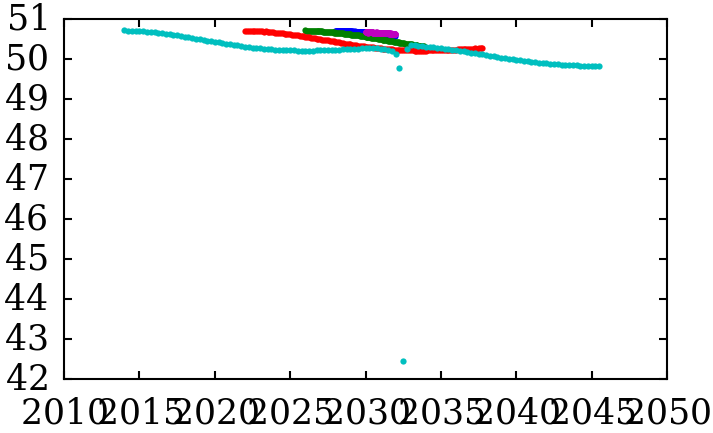

In [7]:
fig, ax = plt.subplots()
ax.plot(1e-6 * sss_i16.sweep.frequency, 20 * np.log10(np.abs(sss_i16.sweep.s21_point)), '.b')
ax.plot(1e-6 * sss_i32.sweep.frequency, 20 * np.log10(np.abs(sss_i32.sweep.s21_point)), '.g')
ax.plot(1e-6 * sss_i64.sweep.frequency, 20 * np.log10(np.abs(sss_i64.sweep.s21_point)), '.r')
ax.plot(1e-6 * sss_i128.sweep.frequency, 20 * np.log10(np.abs(sss_i128.sweep.s21_point)), '.c')
ax.plot(1e-6 * sss_i8.sweep.frequency, 20 * np.log10(np.abs(sss_i8.sweep.s21_point)), '.m')
#ax.plot(1e-6 * sss_wide.sweep.frequency, 20 * np.log10(np.abs(sss_wide.sweep.s21_point)), '.k')

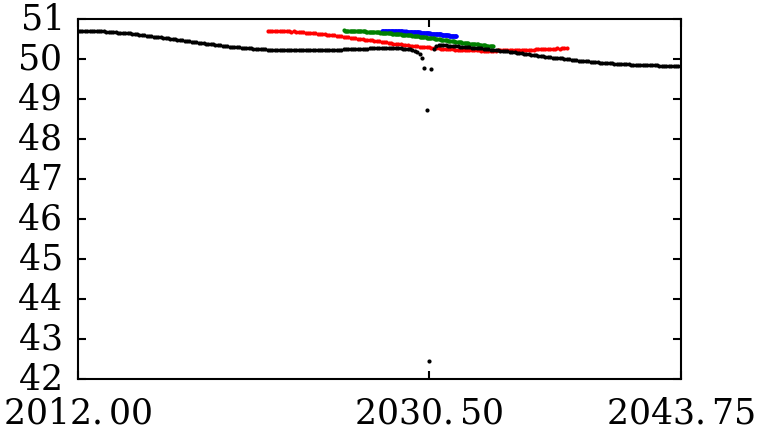

In [8]:
fig, ax = plt.subplots()
amplitude(ax, sss_i16.resonator, data_color='blue')
amplitude(ax, sss_i32.resonator, data_color='green')
amplitude(ax, sss_i64.resonator, data_color='red')
amplitude(ax, sss_wide.resonator, data_color='black')